# Parking Lot Detection

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/ParkingLotDetection

/content/drive/MyDrive/Projects/ParkingLotDetection


In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
import tensorflow.keras.layers as tfl
from config import PATH_TO_IMAGES, PARENT_FOLDER, PATH_TO_PREPROCESSED_DATA
from utils import extract_labels, extract_images, to_corners, predict

## Data extraction

#### Image example

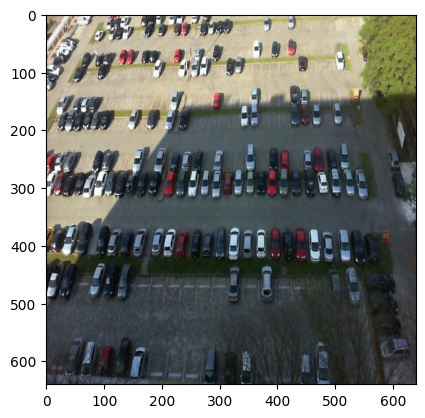

In [ ]:
path_to_images = PATH_TO_IMAGES['test']
img_name = '2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg'
img = cv.imread(os.path.join(path_to_images, img_name))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
train_labels = extract_labels(dataset="train")
train_labels.head()

image_id  is_occupied                   bbox    area  \
0         0            1  [304, 468, 83.5, 114]  9519.0   
1         0            1   [271, 390, 76.5, 89]  6808.5   
2         0            1   [245, 326, 67.5, 80]  5400.0   
3         0            1   [223, 270, 63.5, 73]  4635.5   
4         0            1     [204, 224, 58, 57]  3306.0   

                                           file_name  
0  2013-04-10_12_00_06_jpg.rf.bef78f7879666a6d899...  
1  2013-04-10_12_00_06_jpg.rf.bef78f7879666a6d899...  
2  2013-04-10_12_00_06_jpg.rf.bef78f7879666a6d899...  
3  2013-04-10_12_00_06_jpg.rf.bef78f7879666a6d899...  
4  2013-04-10_12_00_06_jpg.rf.bef78f7879666a6d899...

#### Boxes example

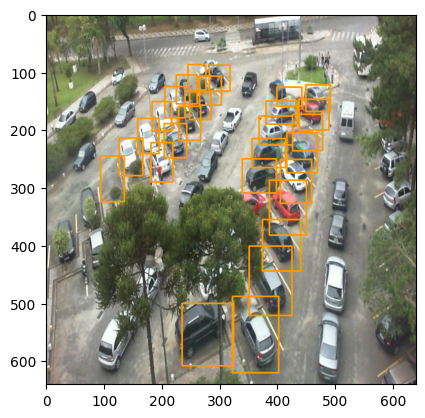

In [ ]:
# num = np.random.randint(train_labels.image_id.max())
sample = train_labels.loc[(train_labels.image_id==num)]

boxes = sample.bbox.to_numpy()
boxes = to_corners(boxes)
occupance = sample.is_occupied.to_numpy()

img_name = sample.file_name.iloc[0]
img = cv.imread(os.path.join(PATH_TO_IMAGES['train'], img_name))

for box in boxes:
    cv.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 153, 255), 2)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

#### Croped boxes

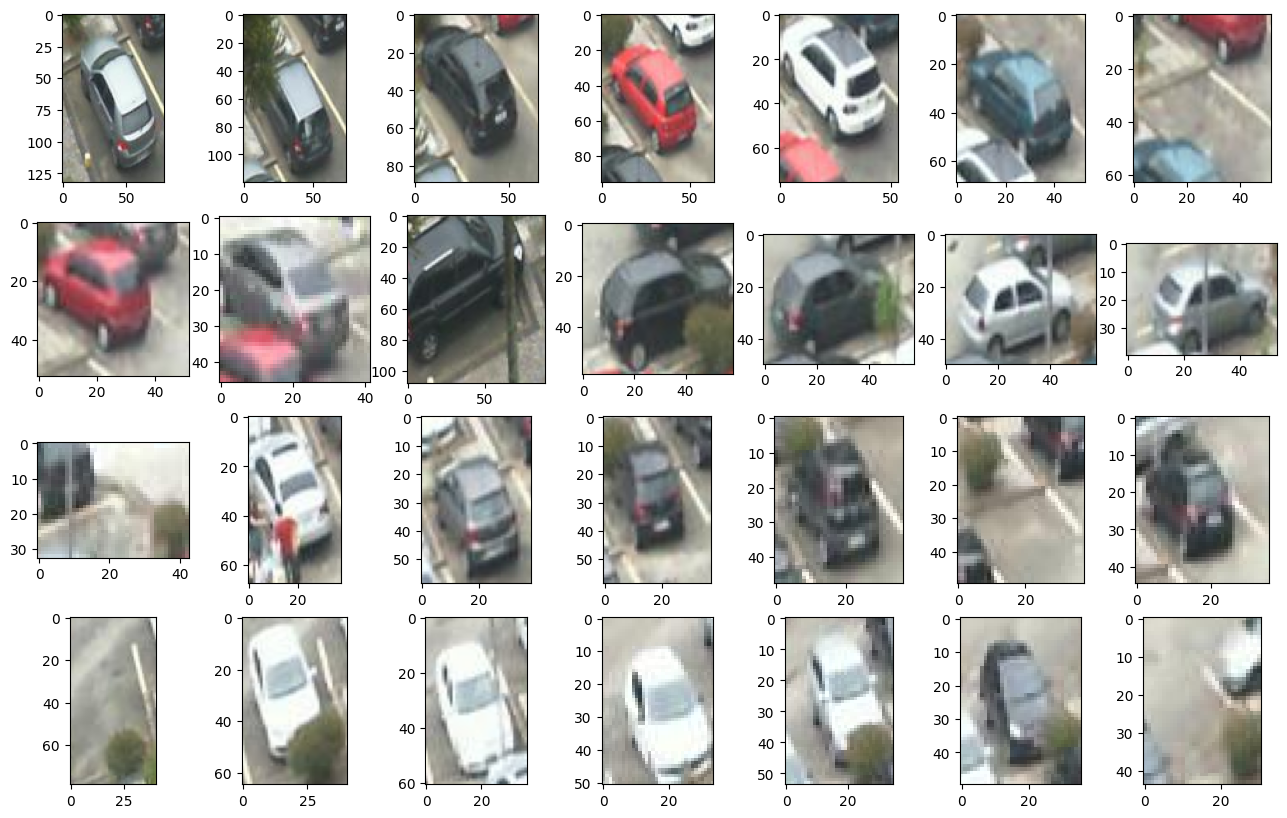

In [ ]:
fig, axs = plt.subplots(4,7, figsize=(16,10))
for i in range(boxes.shape[0]):
  crop_img = img[boxes[i][1]:boxes[i][3], boxes[i][0]:boxes[i][2],:]
  axs[i//7, i%7].imshow(cv.cvtColor(crop_img, cv.COLOR_BGR2RGB))

#### Extraction cropped images for training

In [ ]:
images, target = extract_images(df, size=1000, save=True, output_step=0.05)

Progress: 5%
Train images shape: (2453, 96, 96, 3)
Train target shape: (2453,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection
Progress: 10%
Train images shape: (5461, 96, 96, 3)
Train target shape: (5461,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection
Progress: 15%
Train images shape: (8013, 96, 96, 3)
Train target shape: (8013,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection
Progress: 20%
Train images shape: (10805, 96, 96, 3)
Train target shape: (10805,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection
Progress: 25%
Train images shape: (14077, 96, 96, 3)
Train target shape: (14077,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection
Progress: 30%
Train images shape: (16869, 96, 96, 3)
Train target shape: (16869,)
Images and target data succesf

KeyboardInterrupt: ignored

In [ ]:
images = np.load(os.path.join(PATH_TO_PREPROCESSED_DATA, 'train_images.npy'))
target = np.load(os.path.join(PATH_TO_PREPROCESSED_DATA, 'train_target.npy'))

print(f"Train images shape: {images.shape}")
print(f"Train target shape: {target.shape}")

Train images shape: (28377, 96, 96, 3)
Train target shape: (28377,)


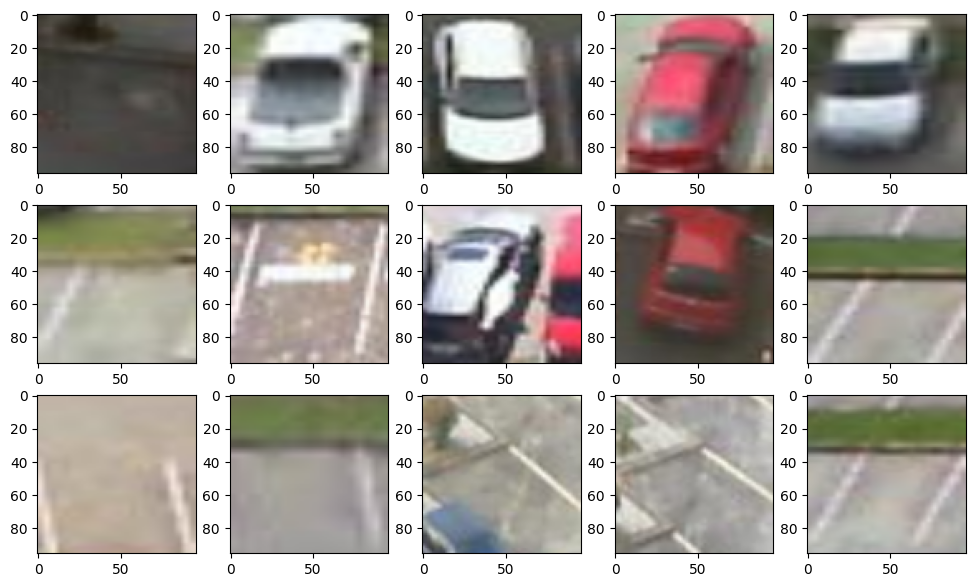

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(12,7))
for i in range(15):
  idx = np.random.randint(0,target.shape[0])
  axs[i//5, i%5].imshow(cv.cvtColor(images[idx], cv.COLOR_BGR2RGB))



#### Extracting validation and test data

In [ ]:
valid_labels = extract_labels("valid")
valid_images, valid_target = extract_images(valid_labels, size=30, dataset='valid', output_step=0.3)
print(f"\33[30mValidation images shape: {valid_images.shape}")
print(f"\33[30mValidation target shape: {valid_target.shape}")

Progress: 30%
Train images shape: (585, 96, 96, 3)
Train target shape: (585,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Progress: 60%
Train images shape: (1185, 96, 96, 3)
Train target shape: (1185,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Progress: 90%
Train images shape: (1677, 96, 96, 3)
Train target shape: (1677,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Validation images shape: (1813, 96, 96, 3)
Validation target shape: (1813,)


In [ ]:
test_labels = extract_labels("test")
test_images, test_target = extract_images(test_labels, size=30, dataset='test', output_step=0.3)
print(f"\33[30mTest images shape: {test_images.shape}")
print(f"\33[30mTest target shape: {test_target.shape}")

Progress: 30%
Train images shape: (561, 96, 96, 3)
Train target shape: (561,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Progress: 60%
Train images shape: (1041, 96, 96, 3)
Train target shape: (1041,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Progress: 90%
Train images shape: (1509, 96, 96, 3)
Train target shape: (1509,)
Images and target data succesfully saved in: /content/drive/MyDrive/Projects/ParkingLotDetection/preprocessed_data
Test images shape: (1669, 96, 96, 3)
Test target shape: (1669,)


## Training

### Transfer learning

In [ ]:
BATCH = 32
IMG_SIZE = (96, 96)
IMG_SHAPE = IMG_SIZE + (3,)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
def car_classifier(img_shape = IMG_SHAPE):

  base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
  
  # freeze the base model by making it non trainable
  base_model.trainable = False

  # create the input layer (Same as the imageNetv2 input size)
  inputs = tf.keras.Input(shape=img_shape) 
  
  # data preprocessing using the same weights the model was trained on
  x = preprocess_input(inputs) 
  
  # set training to False to avoid keeping track of statistics in the batch norm layer
  x = base_model(x, training=False) 
  
  # add the new Binary classification layers
  # use global avg pooling to summarize the info in each channel
  x = tfl.GlobalAveragePooling2D()(x) 
  # include dropout to avoid overfitting
  x = tfl.Dropout(rate=0.3)(x)
      
  # use a prediction layer with one neuron (as a binary classifier only needs one)
  outputs = tfl.Dense(units=1)(x)
  
  model = tf.keras.Model(inputs, outputs)
  
  return model

In [ ]:
model = car_classifier()
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 96, 96, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 96, 96, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0        

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 3
history = model.fit(x=images, y=target, validation_data=(valid_images, valid_target), epochs=initial_epochs, batch_size=BATCH)

Epoch 1/3
887/887 [==============================] - 194s 218ms/step - loss: 0.1188 - accuracy: 0.9575 - val_loss: 0.0852 - val_accuracy: 0.9717
Epoch 2/3
887/887 [==============================] - 196s 221ms/step - loss: 0.1121 - accuracy: 0.9598 - val_loss: 0.0794 - val_accuracy: 0.9717
Epoch 3/3
887/887 [==============================] - 192s 216ms/step - loss: 0.1092 - accuracy: 0.9599 - val_loss: 0.0787 - val_accuracy: 0.9722


In [ ]:
f = lambda x: 1/(1+np.exp(-x))

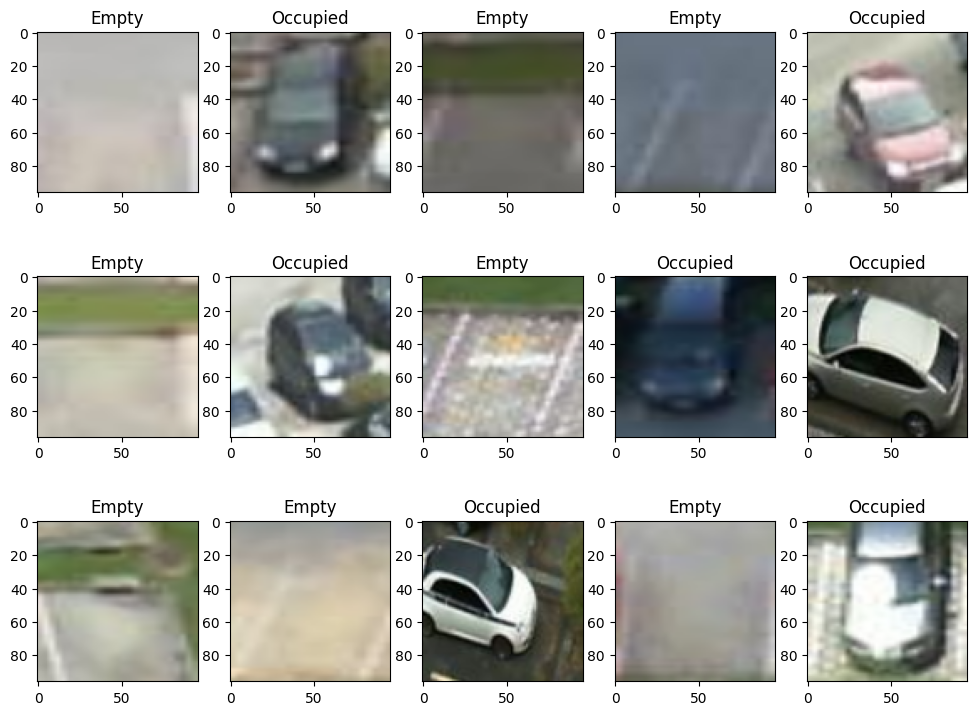

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(12,9))
for i in range(15):
  idx = np.random.randint(0, valid_target.shape[0]+1)
  label = "Occupied" if f(model(valid_images[idx:idx+1], training=False).numpy()[0, 0]) >= 0.5 else "Empty"
  axs[i//5, i%5].set_title(label)
  axs[i//5, i%5].imshow(cv.cvtColor(valid_images[idx], cv.COLOR_BGR2RGB))

### Fine-tuning

In [ ]:
base_model = model.layers[3]
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy', tf.keras.metrics.AUC(from_logits=True)])

In [ ]:
fine_tune_epochs = 3
total_epochs = len(history.epoch) + fine_tune_epochs

history_fine = model.fit(x=images,
                         y=target,
                         batch_size=BATCH,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(valid_images, valid_target))

Epoch 3/6
887/887 [==============================] - 402s 447ms/step - loss: 0.1127 - accuracy: 0.9633 - auc: 0.9865 - val_loss: 0.0642 - val_accuracy: 0.9789 - val_auc: 0.9967
Epoch 4/6
887/887 [==============================] - 332s 374ms/step - loss: 0.0860 - accuracy: 0.9709 - auc: 0.9920 - val_loss: 0.0546 - val_accuracy: 0.9794 - val_auc: 0.9984
Epoch 5/6
887/887 [==============================] - 330s 372ms/step - loss: 0.0737 - accuracy: 0.9714 - auc: 0.9948 - val_loss: 0.0519 - val_accuracy: 0.9799 - val_auc: 0.9980
Epoch 6/6
887/887 [==============================] - 343s 387ms/step - loss: 0.0626 - accuracy: 0.9736 - auc: 0.9965 - val_loss: 0.1641 - val_accuracy: 0.8550 - val_auc: 0.9986


In [ ]:
# a little more training
history_fine = model.fit(x=images,
                         y=target,
                         batch_size=BATCH,
                         epochs=1,
                         validation_data=(valid_images, valid_target))

887/887 [==============================] - 332s 374ms/step - loss: 0.0479 - accuracy: 0.9800 - auc: 0.9980 - val_loss: 0.0384 - val_accuracy: 0.9856 - val_auc: 0.9988


98% accuracy on test set and 98.5% on validation set, excellent result! Let's check accuracy on testing

## Testing

In [ ]:
results = model.evaluate(x=test_images, y=test_target)
results

99% accuracy on test set! Even better than before. But this data from the same source, let's check some random images from internet and images made by myself

Save model and check that after saving results remain the same

In [ ]:
model.save(os.path.join(PARENT_FOLDER, "saved_models/my_model"))

In [ ]:
new_model = tf.keras.models.load_model(os.path.join(PARENT_FOLDER, "saved_models/my_model"))

# Check its architecture
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 96, 96, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 96, 96, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [ ]:
results = new_model.evaluate(x=test_images, y=test_target)
results

53/53 [==============================] - 11s 204ms/step - loss: 0.1245 - accuracy: 0.9664 - auc: 0.9869


[0.12454516440629959, 0.9664469957351685, 0.9869127869606018]

Alright!

Time of execution:  0.3371891975402832


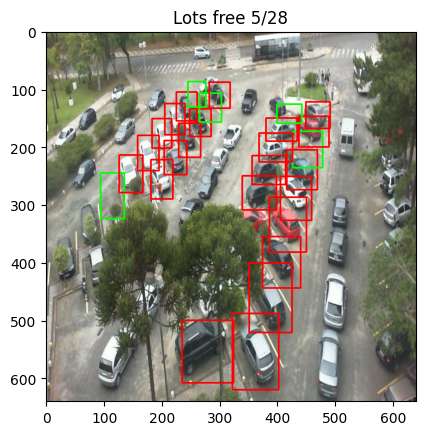

In [ ]:
import time

idx = num #np.random.randint(1,1000)
test_example = train_labels.loc[train_labels.image_id==idx].drop(columns=['image_id', 'is_occupied', 'area'])

start_time = time.time()
img, free_lots, all_lots = predict(new_model, test_example, path=PATH_TO_IMAGES['train'], threshold=0.06)
end_time = time.time()

print("Time of execution: ", end_time - start_time)

ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

 Take a look on examples from other source

In [ ]:
path_to_tests = os.path.join(PARENT_FOLDER, 'custom_tests')

[0.9997 1.     1.     1.     0.9986 0.9998 0.9997 1.     0.9999 0.9999
 0.964  0.998  1.     1.     1.     0.9993 1.     1.     1.     1.
 0.9999 1.     0.9988 1.     0.9999 0.806  1.     1.     1.     1.
 1.    ]


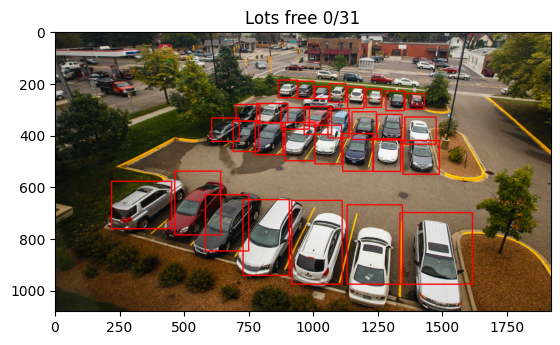

In [ ]:
test1_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels1.pkl'))
img, free_lots, all_lots = predict(new_model, test1_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

[1.     0.     1.     0.9999 0.0011 0.9993 1.     0.     0.     0.
 0.     1.     0.9987 0.     1.     1.     1.     0.     0.     0.
 0.9517 1.     1.     0.     0.     0.     0.     1.     1.     1.    ]


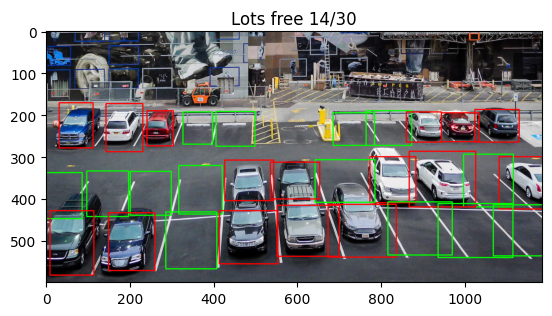

In [ ]:
test2_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels2.pkl'))
img, free_lots, all_lots = predict(new_model, test2_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

[0.     1.     0.     0.     1.     0.     1.     0.9973 0.0758 1.
 0.999  1.     1.     1.     0.9999 1.     1.     0.     0.     0.
 1.     0.9963 1.     1.    ]


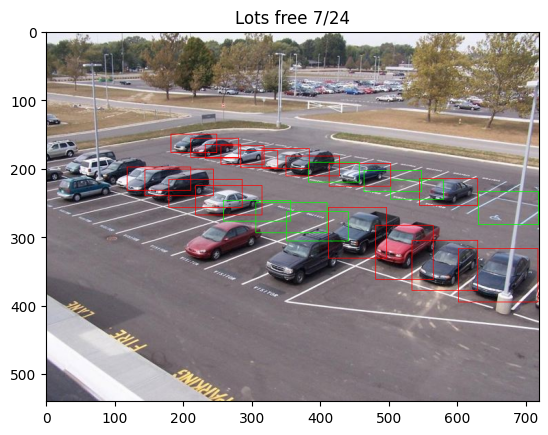

In [ ]:
test3_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels3.pkl'))
img, free_lots, all_lots = predict(new_model, test3_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

[1.000e+00 9.995e-01 1.000e+00 0.000e+00 1.000e-04 1.000e+00 1.000e+00
 5.793e-01 0.000e+00 4.000e-04 1.000e+00 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00]


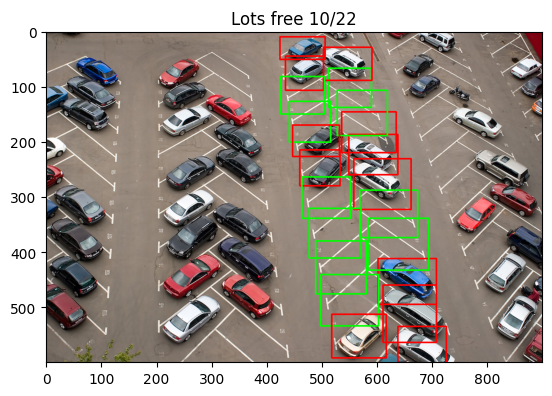

In [ ]:
test4_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels4.pkl'))
img, free_lots, all_lots = predict(new_model, test4_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

[0.9999 0.     0.     0.9995 1.     0.9999 0.     0.     1.     0.
 0.     1.     1.     0.     0.9958 0.     0.0111 1.     0.9999 0.0315
 0.9997 0.9997 0.0015 0.0137 0.9999 0.9999 1.     0.9999 0.9996]


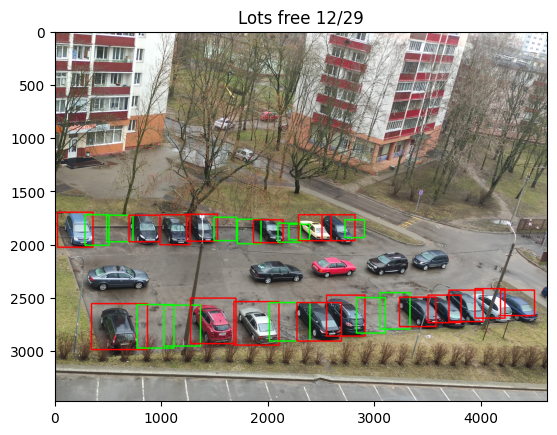

In [ ]:
test5_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels5.pkl'))
img, free_lots, all_lots = predict(new_model, test5_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

[0.     0.     0.9983 0.9999 0.     0.9999 0.9998 0.     0.     0.
 0.    ]


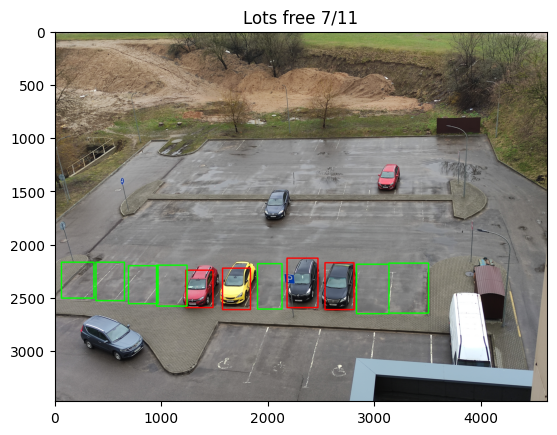

In [ ]:
test6_df = pd.read_pickle(os.path.join(path_to_tests, 'test_labels6.pkl'))
img, free_lots, all_lots = predict(new_model, test6_df, path=path_to_tests, threshold=0.06)
ax = plt.subplot(1,1,1)
ax.set_title(f"Lots free {free_lots}/{all_lots}")
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()